# Predicting software reselling profit

## Import Libraries

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

## Load Dataset

In [114]:
df = pd.read_csv('Tayko.csv')
df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,Partition,Unnamed: 26,Unnamed: 27
0,1,1,0,0,1,0,0,0,0,0,...,3662,3662,1,0,1,1,128,s,NaN,NaN
1,2,1,0,0,0,0,1,0,0,0,...,2900,2900,1,1,0,0,0,s,NaN,NaN
2,3,1,0,0,0,0,0,0,0,0,...,3883,3914,0,0,0,1,127,t,NaN,NaN
3,4,1,0,1,0,0,0,0,0,0,...,829,829,0,1,0,0,0,s,NaN,NaN
4,5,1,0,1,0,0,0,0,0,0,...,869,869,0,0,0,0,0,t,NaN,NaN


In [115]:
df.dtypes

sequence_number           int64
US                        int64
source_a                  int64
source_c                  int64
source_b                  int64
source_d                  int64
source_e                  int64
source_m                  int64
source_o                  int64
source_h                  int64
source_r                  int64
source_s                  int64
source_t                  int64
source_u                  int64
source_p                  int64
source_x                  int64
source_w                  int64
Freq                      int64
last_update_days_ago      int64
1st_update_days_ago       int64
Web order                 int64
Gender=male               int64
Address_is_res            int64
Purchase                  int64
Spending                  int64
Partition                object
Unnamed: 26             float64
Unnamed: 27             float64
dtype: object

# Exploration

### a) Explore the relationship between Spending and each of the two continuous variables by creating two scatters plots (SPENDING vs. FREQ and SPENDING vs. LAST_UPDATE). Does there seem to be a linear relationship there? => Capture Screen !

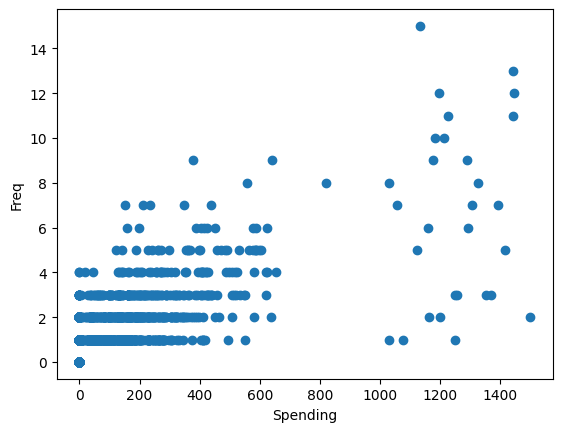

In [116]:
plt.scatter(df['Spending'], df['Freq'])
plt.xlabel('Spending')
plt.ylabel('Freq')
plt.show()

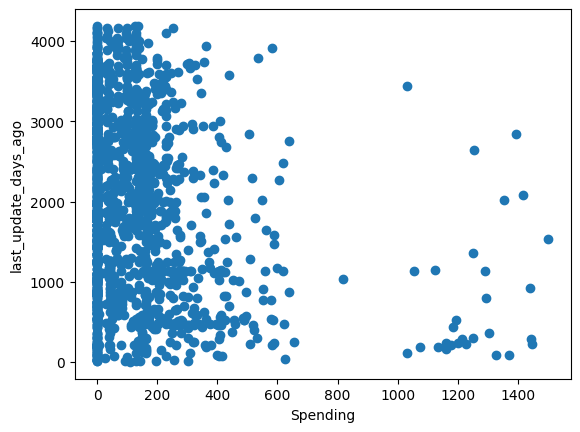

In [117]:
plt.scatter(df['Spending'], df['last_update_days_ago'])
plt.xlabel('Spending')
plt.ylabel('last_update_days_ago')
plt.show()

# Fitting first model

## b) Fit a predictive model for SPENDING using only the following predictors: Freq, Last_update, Web_order, Gender, US, Adress_is_res [Use all these features]

### 1) Partition the 1000 records into training (Partition=t) & test sets (Partition=v)

In [118]:
unique_partitions = df['Partition'].unique()
dfs = {}

for partition in unique_partitions:
  dfs[partition] = df[df['Partition'] == partition]

training_df = dfs['t'].copy()
test_df = dfs['v'].copy()
training_df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,Partition,Unnamed: 26,Unnamed: 27
2,3,1,0,0,0,0,0,0,0,0,...,3883,3914,0,0,0,1,127,t,NaN,NaN
4,5,1,0,1,0,0,0,0,0,0,...,869,869,0,0,0,0,0,t,NaN,NaN
7,8,1,0,0,1,0,0,0,0,0,...,3397,3397,0,1,0,0,0,t,NaN,NaN
8,9,1,1,0,0,0,0,0,0,0,...,525,2914,1,1,0,1,489,t,NaN,NaN
12,13,1,0,0,0,0,0,0,0,0,...,2802,2802,1,1,0,0,0,t,NaN,NaN


In [119]:
test_df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,Partition,Unnamed: 26,Unnamed: 27
9,10,1,1,0,0,0,0,0,0,0,...,3215,3215,0,0,0,1,174,v,NaN,NaN
13,14,1,1,0,0,0,0,0,0,0,...,2081,2438,0,1,0,1,1416,v,NaN,NaN
15,16,0,0,0,0,0,0,0,0,0,...,2523,2523,1,0,0,0,0,v,NaN,NaN
28,29,1,0,0,0,0,0,0,0,0,...,3299,3299,0,0,0,1,90,v,NaN,NaN
30,31,1,0,0,0,0,0,0,0,0,...,3090,3090,0,0,0,0,0,v,NaN,NaN


### 2) Run a multiple regression model for SPENDING with the 6 predictors. => Give the regression equation 1

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

predictor = ['Freq','last_update_days_ago','Web order','Gender=male','US','Address_is_res']

x_train = training_df[predictor]
y_train = training_df['Spending']
x_test = test_df[predictor]
y_test = test_df['Spending']
x = df[predictor]
y = df['Spending']
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [121]:
coefficients = model.coef_

intercept = model.intercept_
score = model.score(x_test, y_test)
print('R-Squared:', '{:.2f}'.format(score))


y_predict = model.predict(x)
mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mse)

print('MSE(Mean_Squared_Error):', '{:.2f}'.format(mse))
print('RMSE(Root_Mean_Squared_Error):', '{:.2f}'.format(rmse))

ic = '{:.2f}'.format(model.intercept_)
interest_rate = '{:.4f}'.format(model.coef_[0])
umemployment_rate = '{:.4f}'.format(model.coef_[1])
print("y = {:.2f} + {:.2f} * x1 + {:.2f} * x2".format(intercept, coefficients[0], coefficients[1]))

R-Squared: 0.51
MSE(Mean_Squared_Error): 17122.50
RMSE(Root_Mean_Squared_Error): 130.85
y = -16.61 + 98.14 * x1 + -0.01 * x2


### 3) Based on the above regression equation and P-value of each predictor, identify the characteristics of high spending buyers.? Please justify your answer

In [122]:
top_5_spending = test_df.sort_values(by='Spending', ascending=False).head(5)
top5list = top_5_spending['Spending'].tolist()
yp = model.predict(top_5_spending[predictor])
for k,i in enumerate(top5list):
  print(f"{i} vs {yp[k]}")

1500 vs 181.3322766114671
1443 vs 1283.3054630777785
1416 vs 470.2451315632371
1305 vs 693.6858026792069
1255 vs 251.01710493444997


### 4) If we need to reduce the number of predictors, which predictor(s) would be dropped from the model?

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

predictor = ['Freq','last_update_days_ago','Web order','US','Address_is_res']

x_train = training_df[predictor]
y_train = training_df['Spending']
x_test = test_df[predictor]
y_test = test_df['Spending']
x = df[predictor]
y = df['Spending']
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [124]:
coefficients = model.coef_

intercept = model.intercept_
score = model.score(x_test, y_test)
print('R-Squared:', '{:.2f}'.format(score))


y_predict = model.predict(x)
mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mse)

print('MSE(Mean_Squared_Error):', '{:.2f}'.format(mse))
print('RMSE(Root_Mean_Squared_Error):', '{:.2f}'.format(rmse))

ic = '{:.2f}'.format(model.intercept_)
interest_rate = '{:.4f}'.format(model.coef_[0])
umemployment_rate = '{:.4f}'.format(model.coef_[1])
print("y = {:.2f} + {:.2f} * x1 + {:.2f} * x2".format(intercept, coefficients[0], coefficients[1]))

R-Squared: 0.51
MSE(Mean_Squared_Error): 17122.58
RMSE(Root_Mean_Squared_Error): 130.85
y = -16.65 + 98.14 * x1 + -0.01 * x2


drop column Gender=male becuase it's almost doesn't have any affect at all (see R-square, MSE, RMSE and equation)

# Fitting second model

## c) Fit a second predictive model for SPENDING using your best predictors:

### 1) Apply multiple linear regression to create a spending prediction model. Then, give the regression equation 2.

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

predictor = ['US','Freq','last_update_days_ago','1st_update_days_ago','Web order','Gender=male','Address_is_res','Purchase']

sel_predictor = []

from itertools import combinations
for i in range(1,len(predictor)):
  for j in combinations(predictor,i):
    j = list(j)
    x_train = training_df[j]
    y_train = training_df['Spending']
    x_test = test_df[j]
    y_test = test_df['Spending']
    x = df[j]
    y = df['Spending']
    model = LinearRegression()
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    # print('R-Squared:', '{:.2f}'.format(score))
    sel_predictor.append((j,score))
for i in sorted(sel_predictor, key=lambda x : x[1],reverse=True)[0:5]:
  print(i)

(['Freq', 'last_update_days_ago', 'Web order', 'Gender=male', 'Address_is_res', 'Purchase'], 0.5661912374451377)
(['Freq', 'last_update_days_ago', 'Gender=male', 'Address_is_res', 'Purchase'], 0.5661673170055173)
(['Freq', 'last_update_days_ago', 'Web order', 'Address_is_res', 'Purchase'], 0.566046334145611)
(['Freq', 'last_update_days_ago', 'Address_is_res', 'Purchase'], 0.5660207580413368)
(['Freq', '1st_update_days_ago', 'Web order', 'Gender=male', 'Address_is_res', 'Purchase'], 0.5656108472518014)


In [126]:
select_prediction = ['Freq', 'last_update_days_ago', 'Web order', 'Gender=male', 'Address_is_res', 'Purchase']
x_train = training_df[select_prediction]
y_train = training_df['Spending']
x_test = test_df[select_prediction]
y_test = test_df['Spending']
x = df[select_prediction]
y = df['Spending']
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [127]:
coefficients = model.coef_

intercept = model.intercept_
score = model.score(x_test, y_test)
print('R-Squared:', '{:.2f}'.format(score))

ic = '{:.2f}'.format(model.intercept_)
interest_rate = '{:.4f}'.format(model.coef_[0])
umemployment_rate = '{:.4f}'.format(model.coef_[1])
print("y = {:.2f} + {:.2f} * x1 + {:.2f} * x2".format(intercept, coefficients[0], coefficients[1]))

R-Squared: 0.57
y = -23.38 + 83.07 * x1 + -0.01 * x2


### 2) Displays the prediction results of the purchase amount in the first record of the test data set, along with indicating the error obtained.

In [132]:
test_df.head(1)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,Partition,Unnamed: 26,Unnamed: 27
9,10,1,1,0,0,0,0,0,0,0,...,3215,3215,0,0,0,1,174,v,NaN,NaN


In [128]:
print(f"{test_df.head(1)['Spending'].values[0]} vs {model.predict(test_df.head(1)[select_prediction])[0]}")

174 vs 121.65720954729414


### 3) Give the performance of the model (error) on the test data set.

In [129]:
y_predict = model.predict(x)
mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mse)

print('MSE(Mean_Squared_Error):', '{:.2f}'.format(mse))
print('RMSE(Root_Mean_Squared_Error):', '{:.2f}'.format(rmse))

MSE(Mean_Squared_Error): 15140.34
RMSE(Root_Mean_Squared_Error): 123.05
